Embeddings are numerical representations of text that capture semantic meaning. Think of them as converting words/sentences into vectors (lists of numbers) in such a way that:
Similar texts have similar vector representations
The relationships between words are preserved in the vector space
They enable semantic search rather than just keyword matching
For example:
"Azure VM" and "Azure Virtual Machine" would have similar embeddings even though the words are different
The embedding can capture that "availability zones" and "high availability" are related concepts

Key points about embeddings:
What they are:
Vectors (arrays of numbers) that represent text
Usually have hundreds of dimensions
Created by neural networks trained on large text datasets
Why we use them:
Better semantic search (meaning-based rather than keyword-based)
Can find related content even with different wording
More efficient than comparing raw text
In our code:
We use sentence-transformers to create embeddings
Each section of documentation gets its own embedding
Questions are converted to embeddings to find the most relevant section
Similarity is calculated using cosine similarity between vectors
Example of how embeddings capture meaning:

The embeddings help our chatbot:
Understand the user's question better
Find relevant documentation even if the wording is different
Provide more accurate answers by matching semantic meaning

In [3]:
import requests
from bs4 import BeautifulSoup
import re
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch
import numpy as np
import pandas as pd
import time
from tqdm import tqdm
import logging

/opt/miniconda3/envs/cursor-conda-python-3.11.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from sentence_transformers import SentenceTransformer
import numpy as np

def demonstrate_embeddings():
    print("Loading embedding model...")
    model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Example texts with varying similarity
    texts = [
        "Azure virtual machines are cloud computing resources",
        "Azure VMs provide compute power in the cloud",  # Similar to first text
        "How to create a VM in Azure",                   # Related but different
        "Azure storage accounts for data",               # Different topic
        "Pizza recipes and cooking tips"                 # Completely unrelated
    ]
    
    print("\nGenerating embeddings for example texts...")
    # Generate embeddings for all texts
    embeddings = model.encode(texts)
    
    # Print embedding shape to understand the vector size
    print(f"\nEach embedding is a vector of {embeddings.shape[1]} dimensions")
    print(f"First embedding first 5 values: {embeddings[0][:5]}")
    
    # Calculate similarities between texts
    print("\nSimilarity scores (cosine similarity):")
    print("1.0 = identical, 0.0 = completely different\n")
    
    for i, text1 in enumerate(texts):
        for j, text2 in enumerate(texts[i+1:], i+1):
            # Calculate cosine similarity
            similarity = np.dot(embeddings[i], embeddings[j]) / (
                np.linalg.norm(embeddings[i]) * np.linalg.norm(embeddings[j])
            )
            print(f"\nText 1: {text1}")
            print(f"Text 2: {text2}")
            print(f"Similarity: {similarity:.3f}")
            
            # Provide interpretation
            if similarity > 0.8:
                print("📈 Very similar meaning")
            elif similarity > 0.5:
                print("🔄 Related topics")
            else:
                print("📉 Different topics")
            print("-" * 80)

if __name__ == "__main__":
    demonstrate_embeddings()

Loading embedding model...

Generating embeddings for example texts...

Each embedding is a vector of 384 dimensions
First embedding first 5 values: [ 0.02225943  0.05078722 -0.00940471  0.0253767   0.04855259]

Similarity scores (cosine similarity):
1.0 = identical, 0.0 = completely different


Text 1: Azure virtual machines are cloud computing resources
Text 2: Azure VMs provide compute power in the cloud
Similarity: 0.755
🔄 Related topics
--------------------------------------------------------------------------------

Text 1: Azure virtual machines are cloud computing resources
Text 2: How to create a VM in Azure
Similarity: 0.640
🔄 Related topics
--------------------------------------------------------------------------------

Text 1: Azure virtual machines are cloud computing resources
Text 2: Azure storage accounts for data
Similarity: 0.473
📉 Different topics
--------------------------------------------------------------------------------

Text 1: Azure virtual machines are clo

Visual represeantion of embeddings

Generating embeddings...
Creating visualizations...


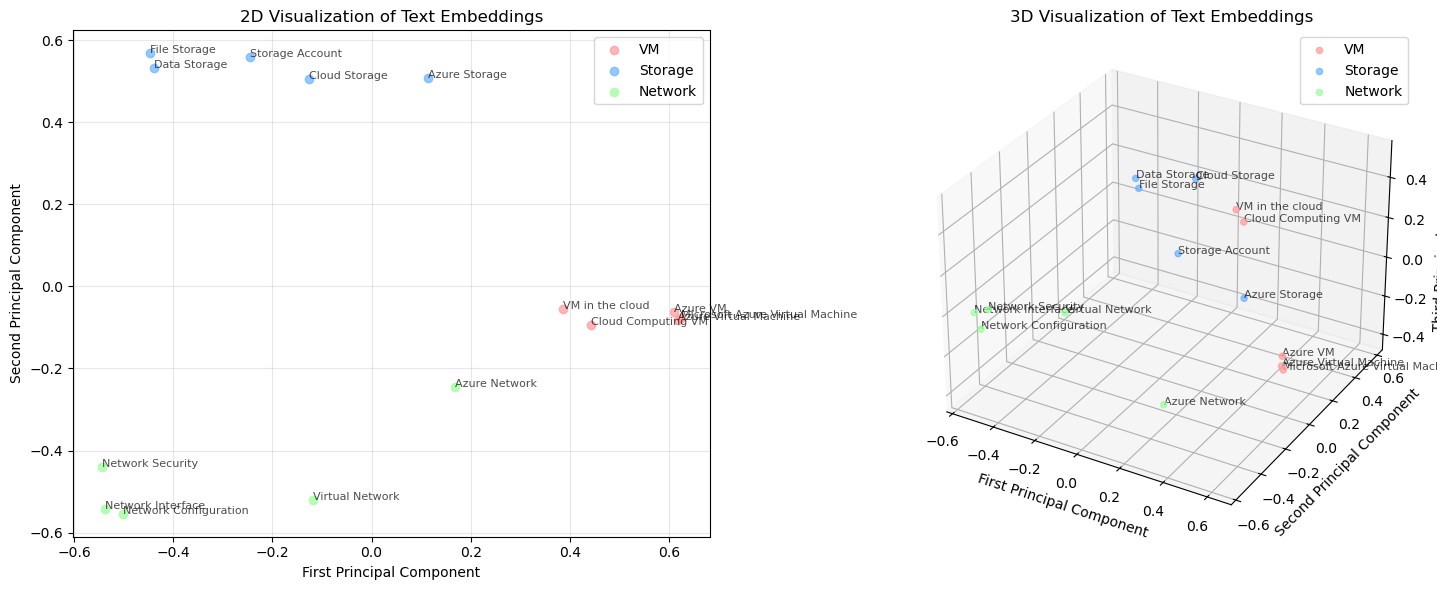

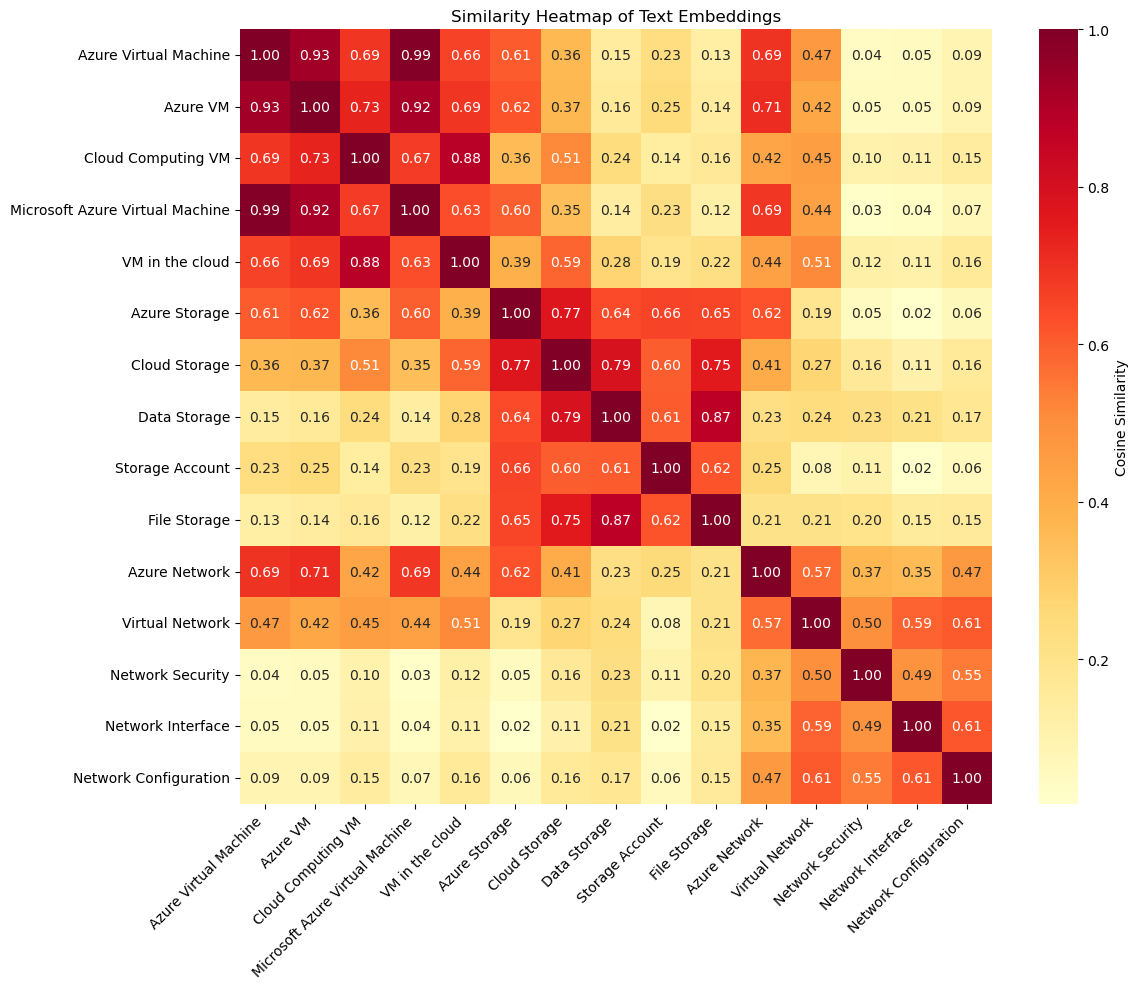

In [10]:
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def visualize_embeddings():
    # Create groups of related texts
    azure_vm_texts = [
        "Azure Virtual Machine",
        "Azure VM",
        "Cloud Computing VM",
        "Microsoft Azure Virtual Machine",
        "VM in the cloud"
    ]
    
    storage_texts = [
        "Azure Storage",
        "Cloud Storage",
        "Data Storage",
        "Storage Account",
        "File Storage"
    ]
    
    network_texts = [
        "Azure Network",
        "Virtual Network",
        "Network Security",
        "Network Interface",
        "Network Configuration"
    ]
    
    # Combine all texts and create labels
    all_texts = azure_vm_texts + storage_texts + network_texts
    labels = (["VM"] * len(azure_vm_texts) + 
             ["Storage"] * len(storage_texts) + 
             ["Network"] * len(network_texts))
    
    # Generate embeddings
    print("Generating embeddings...")
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(all_texts)
    
    # Create both 2D and 3D visualizations
    print("Creating visualizations...")
    
    # Set up the figure with two subplots
    fig = plt.figure(figsize=(15, 6))
    
    # 2D Plot
    plt.subplot(121)
    visualize_2d(embeddings, all_texts, labels)
    
    # 3D Plot
    ax = fig.add_subplot(122, projection='3d')
    visualize_3d(embeddings, all_texts, labels, ax)
    
    plt.tight_layout()
    plt.show()
    
    # Create similarity heatmap
    create_similarity_heatmap(embeddings, all_texts)

def visualize_2d(embeddings, texts, labels):
    """Create 2D visualization of embeddings"""
    # Reduce to 2 dimensions
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    # Create scatter plot
    unique_labels = list(set(labels))
    colors = ['#FF9999', '#66B2FF', '#99FF99']
    
    for label, color in zip(unique_labels, colors):
        mask = [l == label for l in labels]
        plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], 
                   c=color, label=label, alpha=0.7)
    
    # Add labels for each point
    for i, txt in enumerate(texts):
        plt.annotate(txt, (embeddings_2d[i, 0], embeddings_2d[i, 1]), 
                    fontsize=8, alpha=0.7)
    
    plt.title("2D Visualization of Text Embeddings")
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")
    plt.legend()
    plt.grid(True, alpha=0.3)

def visualize_3d(embeddings, texts, labels, ax):
    """Create 3D visualization of embeddings"""
    # Reduce to 3 dimensions
    pca = PCA(n_components=3)
    embeddings_3d = pca.fit_transform(embeddings)
    
    # Create scatter plot
    unique_labels = list(set(labels))
    colors = ['#FF9999', '#66B2FF', '#99FF99']
    
    for label, color in zip(unique_labels, colors):
        mask = [l == label for l in labels]
        ax.scatter(embeddings_3d[mask, 0], 
                  embeddings_3d[mask, 1], 
                  embeddings_3d[mask, 2], 
                  c=color, label=label, alpha=0.7)
    
    # Add labels for each point
    for i, txt in enumerate(texts):
        ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], 
                txt, fontsize=8, alpha=0.7)
    
    ax.set_title("3D Visualization of Text Embeddings")
    ax.set_xlabel("First Principal Component")
    ax.set_ylabel("Second Principal Component")
    ax.set_zlabel("Third Principal Component")
    ax.legend()

def create_similarity_heatmap(embeddings, texts):
    """Create a heatmap of similarities between texts"""
    # Calculate similarity matrix
    similarity_matrix = np.zeros((len(texts), len(texts)))
    
    for i in range(len(texts)):
        for j in range(len(texts)):
            similarity = np.dot(embeddings[i], embeddings[j]) / (
                np.linalg.norm(embeddings[i]) * np.linalg.norm(embeddings[j])
            )
            similarity_matrix[i, j] = similarity
    
    # Create heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(similarity_matrix, 
                xticklabels=texts, 
                yticklabels=texts, 
                cmap='YlOrRd', 
                annot=True, 
                fmt='.2f', 
                cbar_kws={'label': 'Cosine Similarity'})
    
    plt.title("Similarity Heatmap of Text Embeddings")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def print_similarities(embeddings, texts):
    """Print similarity scores between all pairs of texts"""
    print("\nSimilarity Scores:")
    for i in range(len(texts)):
        for j in range(i+1, len(texts)):
            similarity = np.dot(embeddings[i], embeddings[j]) / (
                np.linalg.norm(embeddings[i]) * np.linalg.norm(embeddings[j])
            )
            print(f"\nText 1: {texts[i]}")
            print(f"Text 2: {texts[j]}")
            print(f"Similarity: {similarity:.3f}")
            
            # Add interpretation
            if similarity > 0.8:
                print("📈 Very similar meaning")
            elif similarity > 0.5:
                print("🔄 Related topics")
            else:
                print("📉 Different topics")
            print("-" * 80)

if __name__ == "__main__":
    # Make sure the plots are displayed in Jupyter notebook
    %matplotlib inline
    
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Run visualizations
    visualize_embeddings()